# Homework 4

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import time
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 100

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# 3. Stroke Prediction


In [2]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
data.isnull().sum(), data.shape

(gender                 0
 age                    0
 hypertension           0
 heart_disease          0
 ever_married           0
 work_type              0
 Residence_type         0
 avg_glucose_level      0
 bmi                  201
 smoking_status         0
 stroke                 0
 dtype: int64,
 (5110, 11))

In [4]:
data = data.dropna()
data = pd.get_dummies(data, drop_first=True)

In [5]:
X = data.drop(['stroke'], axis=1).to_numpy()
Y = data[['stroke']]
X_train, X_test, y_train, y_test = train_test_split(X,Y,train_size = 0.7, test_size = 0.3,random_state = 123)

Perceptron model acuracy: 95.86%
Perceptron training runtime: 0.201 s


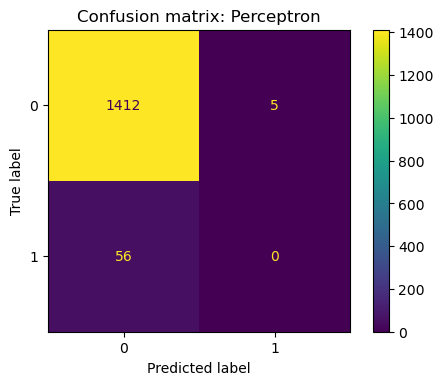

In [6]:
pipe = make_pipeline(RandomForestClassifier(n_estimators=100))
start = time.time()
rf_clf_model = pipe.fit(X_train, y_train.values.ravel())
end = time.time()

disp = plot_confusion_matrix(rf_clf_model, X_test, y_test)
disp.ax_.set_title("Confusion matrix: Perceptron")
acc = rf_clf_model.score(X_test, y_test)
print("Perceptron model acuracy: {:.2f}%".format(acc*100))
print("Perceptron training runtime: %.3f s" % (end-start))

# 4. Digit Classification Classifier Comparison:


In [7]:
X_train = np.load('X_train.npy').astype('int32')
y_train = np.load('y_train.npy')

X_test = np.load('X_test.npy').astype('int32')
y_test = np.load('y_test.npy')

X_train.shape, y_train.shape

((1257, 64), (1257,))

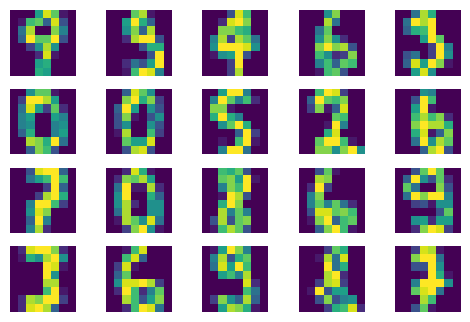

In [8]:
#show 20 random images from the data set
n_images = X_train.shape[0]
n_rows=4
n_cols=5

for i in range(1,n_rows*n_cols+1):
    im_idx = random.randint(0,n_images-1)
    pixels=X_train[im_idx].reshape([8,8])
    plt.subplot(n_rows, n_cols, i)
    plt.imshow(pixels)
    plt.axis('off')
plt.show()

## Build the following classifier models on your testing data:
### (i) Perceptron

Perceptron model acuracy: 94.44%
Perceptron training runtime: 0.014 s


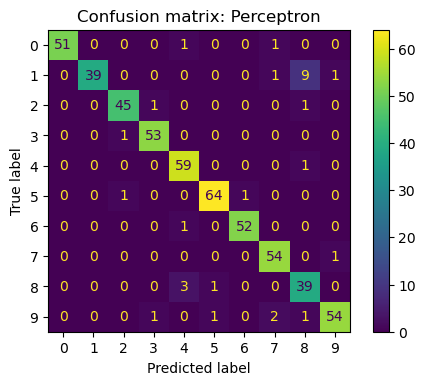

In [9]:
pipe = make_pipeline(Perceptron(tol=1e-3, random_state=0))
start = time.time()
pt_clf_model = pipe.fit(X_train, y_train)
end = time.time()

disp = plot_confusion_matrix(pt_clf_model, X_test, y_test)
disp.ax_.set_title("Confusion matrix: Perceptron")
acc = pt_clf_model.score(X_test, y_test)
print("Perceptron model acuracy: {:.2f}%".format(acc*100))
print("Perceptron training runtime: %.3f s" % (end-start))

### (ii) Logistic Regression

Logistic Regression classifier acuracy: 95.37%
Perceptron training runtime: 0.080 s


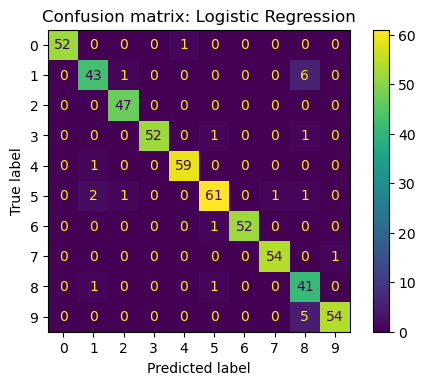

In [10]:
pipe = make_pipeline(LogisticRegression(solver='liblinear'))

start = time.time()
lr_clf_model = pipe.fit(X_train, y_train)
end = time.time()

disp = plot_confusion_matrix(lr_clf_model, X_test, y_test)
disp.ax_.set_title("Confusion matrix: Logistic Regression")
acc = lr_clf_model.score(X_test, y_test)

print("Logistic Regression classifier acuracy: {:.2f}%".format(acc*100))
print("Perceptron training runtime: %.3f s" % (end-start))

### (ii) Gaussian Naïve Bayes

Logistic Regression classifier acuracy: 85.19%
Perceptron training runtime: 0.001 s


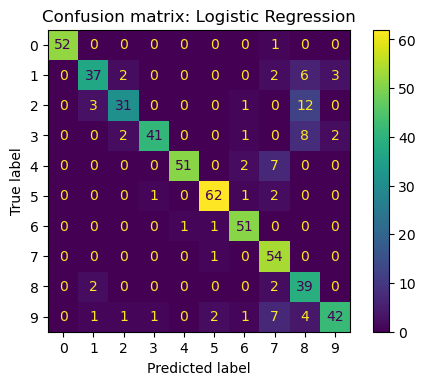

In [11]:
pipe = make_pipeline(GaussianNB())

start = time.time()
gnb_clf_model = pipe.fit(X_train, y_train)
end = time.time()

disp = plot_confusion_matrix(gnb_clf_model, X_test, y_test)
disp.ax_.set_title("Confusion matrix: Logistic Regression")
acc = gnb_clf_model.score(X_test, y_test)

print("Logistic Regression classifier acuracy: {:.2f}%".format(acc*100))
print("Perceptron training runtime: %.3f s" % (end-start))

**Which model has the highest accuracy?**


Logistic Regression attained the best accuracy of 95.37%, however, Perceptron's performance is comarable to similar level. 
The former took 0.080 s for training while the later took 0.014 s. Hence, just talking about the accuracy, Logistic Regression seems to be the best classififer of the given choices.


**Which model is the fastest to train and which one is the slowest?**


As per the reports above:
   - Fastet: Gaussian Naïve Bayes: 0.001 s
   - Slowest: Logistic Regression: 0.080 s
            